In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn

%matplotlib inline

# Another way of thinking of SE(2) signatures
We think of our image as a surface in 3 space. We use up two parameters, to translate the point in question to the origin. The third parameter is used to rotate the surface so $\nabla f$ is aligned with the first coordinate axis. The invariants are then 
* The function value
* $|\nabla f|$
* Any function of the remaining derivatives. e.g. the trace and determinant of the Hessian

How does this distinguish between SE2 and E2? Not sure

In [3]:
def SE2signature(F, h=1):
    """ Compute equiaffine-invariant image signature using finite differences"""
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
    
    I0 = F # function value
    I1 = Fx*Fx + Fy*Fy
    I2 = Fxx + Fyy
    return (I0, I1, I2)

## Test image
We use as our test function the function `f(x, y)` defined below

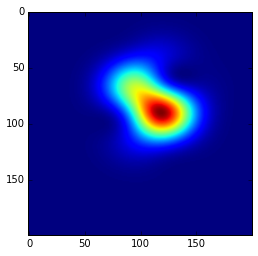

In [4]:
def f(x, y):
    return 0.5*(1 + np.sin(4*x) * np.cos(7*y)) * 2*np.exp(-10*((x - 0.1)**2 + (y+0.2)**2))

h = 0.01
X, Y = np.meshgrid(np.arange(-1, 1, h), np.arange(-1, 1, h))
F0 = f(X, Y)
plt.imshow(F0)

## Transformation
We generate a random SE2 transformation $x \mapsto Ax + b$, $\det A = 1$, $A^TA = I$ as follows:


In [6]:
from numpy.random import rand, randn
from numpy.linalg import qr

A = qr(randn(2,2))[0]
if np.linalg.det(A) < 0:
    A[:, 1] = -A[:, 1]
A = A / np.sqrt(np.linalg.det(A))
b = 0.2 * randn(2)
Ainv = np.linalg.inv(A)
binv = -np.linalg.solve(A, b)


The image and its transformation are plotted below


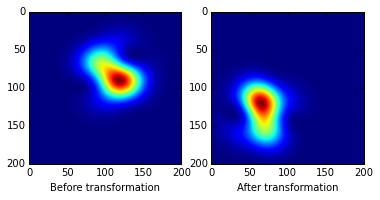

In [7]:
F1 = f(Ainv[0,0]*X + Ainv[0,1]*Y + binv[0], Ainv[1,0]*X + Ainv[1,1]*Y + binv[1])

#a, b, c, d, e, ff, g, h, i = randn(9)
#F1 = f((a*X + b*Y + c)/(g*X + h*Y + i), (d*X + e*Y + ff)/(g*X + h*Y + i))

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(F0)
axarr[0].set_xlabel('Before transformation')
axarr[1].imshow(F1)
axarr[1].set_xlabel('After transformation')

## Compare signatures of the two images
We compare the signatures for a few contours (with respect to the function value)


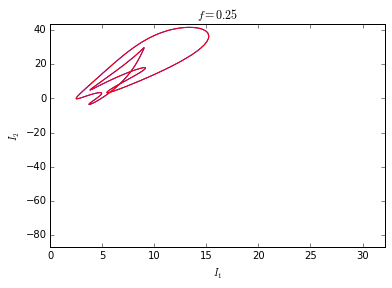

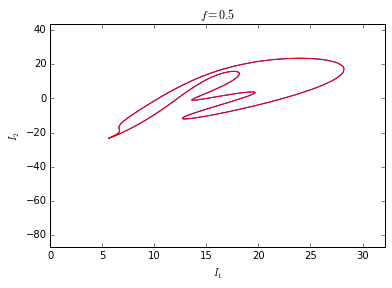

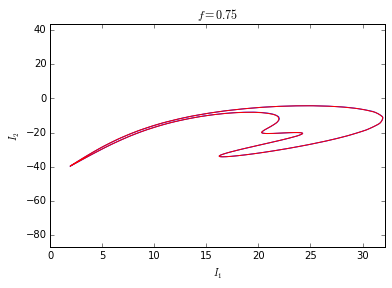

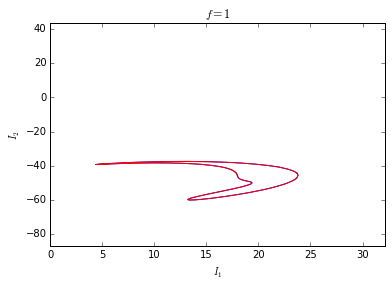

In [12]:
%matplotlib inline
sig0 = SE2signature(F0, h)
sig1 = SE2signature(F1, h)
contour_levels = [0.25, 0.5, 0.75, 1]

i0 = 1
i1 = 2

for level in contour_levels:
    plt.figure()
    plt.contour(sig0[i0], sig0[i1], sig0[0], levels=[level], colors='blue')
    plt.contour(sig1[i0], sig1[i1], sig1[0], levels=[level], colors='red')
    plt.xlabel('$I_1$')
    plt.ylabel('$I_2$')
    plt.title('$f = {}$'.format(level))


In [12]:
from sympy import *
init_printing()

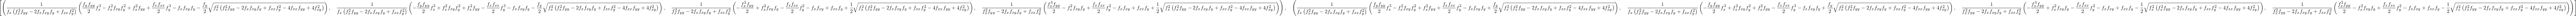

In [70]:
a, b, c, d = symbols('a b c d')
fx, fy = symbols('f_x, f_y')
fxx, fxy, fyy = symbols('f_xx, f_xy, f_yy')
A = Matrix([[a, b], [c, d]])
df = Matrix([[fx], [fy]])
d2f = Matrix([[fxx, fxy], [fxy, fyy]])


solve((Eq(A.T*df, Matrix([[1], [1]])), Eq(sum(A.T*d2f*A), 1), Eq(det(A), 1)), (a, b, c, d))
